In [26]:
import numpy as np
import pandas as pd

import pycaret as pc
from pycaret.classification import *

In [3]:
# read and prepare the dataframe:

miccai_3dt1 = pd.read_csv('CSV-Dasets/MICCAI_3DT1.csv')

wmh_3dt1 = pd.read_csv('CSV-Dasets/WMH_3DT1.csv')

lesions = pd.DataFrame()
lesions = lesions.append(miccai_3dt1, ignore_index=True)
lesions = lesions.append(wmh_3dt1, ignore_index=True)

classification = lesions['class']

del lesions['Patient_ID']
del lesions['class']

lesions

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_TotalEnergy,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Correlation,original_glcm_DifferenceAverage,original_glcm_DifferenceEntropy,original_glcm_DifferenceVariance,original_glcm_Id,original_glcm_Idm,original_glcm_Idmn,original_glcm_Idn,original_glcm_Imc1,original_glcm_Imc2,original_glcm_InverseVariance,original_glcm_JointAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_MCC,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glcm_SumSquares,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_GrayLevelVariance,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformity,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_HighGrayLevelEmphasis,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,wavelet_10Percentile,wavelet_90Percentile,wavelet_Energy,wavelet_Entropy,wavelet_InterquartileRange,wavelet_Kurtosis,wavelet_Maximum,wavelet_MeanAbsoluteDeviation,wavelet_Mean,wavelet_Median,wavelet_Minimum,wavelet_Range,wavelet_RobustMeanAbsoluteDeviation,wavelet_RootMeanSquared,wavelet_Skewness,wavelet_TotalEnergy,wavelet_Uniformity,wavelet_Variance,lbp_10Percentile,lbp_90Percentile,lbp_Energy,lbp_Entropy,lbp_InterquartileRange,lbp_Kurtosis,lbp_Maximum,lbp_MeanAbsolut

### Exploratory Data Analysis: Shape Features Correlation

In [4]:
shape_features = list(filter(lambda x: 'shape' in x, lesions.columns))
len(shape_features)
#shape_features

14

In [5]:
non_shape_features = list(filter(lambda x: 'shape' not in x, lesions.columns))
len(non_shape_features)

147

In [6]:
corr_matrix = lesions.corr()
corr_matrix = corr_matrix[non_shape_features]
#del corr_matrix[shape_features]
corr_matrix = corr_matrix[corr_matrix.index.isin(shape_features)]
#type(corr_matrix)

In [7]:
corr_matrix

,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_TotalEnergy,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Correlation,original_glcm_DifferenceAverage,original_glcm_DifferenceEntropy,original_glcm_DifferenceVariance,original_glcm_Id,original_glcm_Idm,original_glcm_Idmn,original_glcm_Idn,original_glcm_Imc1,original_glcm_Imc2,original_glcm_InverseVariance,original_glcm_JointAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_MCC,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glcm_SumSquares,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_GrayLevelVariance,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformity,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_HighGrayLevelEmphasis,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,wavelet_10Percentile,wavelet_90Percentile,wavelet_Energy,wavelet_Entropy,wavelet_InterquartileRange,wavelet_Kurtosis,wavelet_Maximum,wavelet_MeanAbsoluteDeviation,wavelet_Mean,wavelet_Median,wavelet_Minimum,wavelet_Range,wavelet_RobustMeanAbsoluteDeviation,wavelet_RootMeanSquared,wavelet_Skewness,wavelet_TotalEnergy,wavelet_Uniformity,wavelet_Variance,lbp_10Percentile,lbp_90Percentile,lbp_Energy,lbp_Entropy,lbp_InterquartileRange,lbp_Kurtosis,lbp_Maximum,lbp_MeanAbsoluteDeviation,lbp_Mean,lbp_Median,lbp_Minimum,lbp_Range,lbp_RobustMeanAbsoluteDeviation,lbp_RootMeanSquared,lbp_Skewness,lbp_TotalEnergy,lbp_Uniformity,lbp_Variance,gradient_10Percentile,gradient_90Percentile,gradient_Energy,gradient_Entropy,gradient_InterquartileRange,gradient_Kurtosis,gradient_Maximum,gradient_MeanAbsoluteDeviation,gradient_Mean,gradient_Median,gradient_Minimum,gradient_Range,gradient_RobustMeanAbsoluteDeviati

#### Identifying and Eliminating shape-correllated features

In [8]:
corr_matrix['original_firstorder_10Percentile']['original_shape_VoxelVolume']

-0.22284497184730503

In [9]:
describe = corr_matrix.describe()
uncorr_feats = [feat for feat in corr_matrix.columns if (describe[feat]['max']<0.5 or describe[feat]['min']>-0.5)]
corr_feats = [feat for feat in corr_matrix.columns if (describe[feat]['max']>0.5 or describe[feat]['min']<-0.5)]
len(uncorr_feats)

105

In [17]:
# Defining the uncorrelated dataset:
lesions_prep = lesions[uncorr_feats]
lesions_prep['lesion_type'] = classification

lesions_prep = lesions_prep.sample(frac=1, random_state=10).reset_index()
lesions_prep.shape

(194, 107)

#### Verifying outliers

In [18]:

lesions_prep.describe()

,index,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,...,gradient_Entropy,gradient_InterquartileRange,gradient_Kurtosis,gradient_Maximum,gradient_MeanAbsoluteDeviation,gradient_Minimum,gradient_Range,gradient_RobustMeanAbsoluteDeviation,gradient_Uniformity,gradient_Variance
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,...,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,96.500000,35.940206,59.944845,3.380190,13.452320,2.891931,69.412371,7.587513,48.224983,48.672680,...,3.560073,24.214850,2.345083,57.172501,12.821936,0.293366,56.879135,10.376277,0.117300,222.076399
std,56.147128,10.620414,8.295445,0.597426,7.161668,1.121671,9.495298,3.280591,8.811708,9.850558,...,0.376313,6.812312,1.017091,8.124581,2.854780,0.394612,8.170282,2.912849,0.044546,85.048144
min,0.000000,6.000000,38.000000,0.887424,1.000000,1.334804,48.000000,0.927999,19.430926,17.000000,...,2.194147,6.978326,1.372330,35.017853,4.991277,0.000000,34.517853,3.074423,0.056148,45.354618
25%,48.250000,30.000000,55.000000,3.056477,9.000000,2.328417,63.000000,5.411143,43.277942,43.000000,...,3.370695,20.509854,1.775598,51.997582,11.182175,0.000000,51.648161,8.726888,0.086664,176.498354
50%,96.500000,36.500000,61.000000,3.496608,12.000000,2.766496,69.500000,7.155990,49.268849,49.000000,...,3.594051,23.980177,2.135703,57.447803,12.916378,0.000000,56.833832,10.207817,0.105439,214.877691
75%,144.750000,42.000000,65.000000,3.771973,17.000000,3.258958,75.000000,9.342285,52.751253,54.000000,...,3.840817,27.381821,2.594091,62.363852,14.193790,0.500000,62.325216,11.891041,0.133673,257.200348
max,193.000000,67.000000,83.000000,4.499577,38.000000,11.894353,94.000000,17.562062,71.988228,74.000000,...,4.320051,48.647185,11.030901,78.539803,22.840679,2.121320,78.539803,20.791366,0.291755,579.474584


In [20]:
setup(lesions_prep, target='lesion_type', normalize=True, n_jobs=10, use_gpu=True, train_size=0.8)

,Description,Value
0,session_id,861
1,Target,lesion_type
2,Target Type,Binary
3,Label Encoded,"CVL: 0, MSL: 1"
4,Original Data,"(194, 107)"
5,Missing Values,False
6,Numeric Features,106
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


('lightgbm',
 {'acc': <pycaret.containers.metrics.classification.AccuracyMetricContainer at 0x14324309ca0>,
  'auc': <pycaret.containers.metrics.classification.ROCAUCMetricContainer at 0x14324309f40>,
  'recall': <pycaret.containers.metrics.classification.RecallMetricContainer at 0x14324309fa0>,
  'precision': <pycaret.containers.metrics.classification.PrecisionMetricContainer at 0x14324309880>,
  'f1': <pycaret.containers.metrics.classification.F1MetricContainer at 0x14324309640>,
  'kappa': <pycaret.containers.metrics.classification.KappaMetricContainer at 0x14324309610>,
  'mcc': <pycaret.containers.metrics.classification.MCCMetricContainer at 0x14324309a00>},
 [('Setup Config',
                                  Description             Value
   0                               session_id               861
   1                                   Target       lesion_type
   2                              Target Type            Binary
   3                            Label Encoded    CVL:

In [21]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9229,0.9806,0.9196,0.9350,0.9218,0.8449,0.8542,0.0440
lda,Linear Discriminant Analysis,0.9154,0.9423,0.9089,0.9264,0.9152,0.8306,0.8351,0.0290
svm,SVM - Linear Kernel,0.9033,0.0000,0.9071,0.9078,0.9018,0.8054,0.8155,0.0180
ridge,Ridge Classifier,0.9025,0.0000,0.8536,0.9564,0.8926,0.8036,0.8199,0.0180
et,Extra Trees Classifier,0.8779,0.9417,0.8946,0.8833,0.8764,0.7544,0.7732,0.7380
lightgbm,Light Gradient Boosting Machine,0.8717,0.9384,0.8821,0.8828,0.8713,0.7414,0.7586,0.5000
ada,Ada Boost Classifier,0.8592,0.9402,0.8464,0.8839,0.8563,0.7174,0.7290,0.2200
gbc,Gradient Boosting Classifier,0.8450,0.9504,0.8554,0.8551,0.8434,0.6881,0.7071,0.3660
rf,Random Forest Classifier,0.8396,0.9307,0.8821,0.8297,0.8478,0.6776,0.6913,0.7790
knn,K Neighbors Classifier,0.7929,0.8992,0.7250,0.8532,0.7599,0.5826,0.6061,0.0690


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=861, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9375,0.9688,0.8750,1.0000,0.9333,0.8750,0.8819
2,0.8750,0.9375,0.8750,0.8750,0.8750,0.7500,0.7500
3,0.8750,0.9531,1.0000,0.8000,0.8889,0.7500,0.7746
4,0.8750,1.0000,1.0000,0.8000,0.8889,0.7500,0.7746
5,0.8667,1.0000,0.7143,1.0000,0.8333,0.7273,0.7559
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9333,1.0000,0.8571,1.0000,0.9231,0.8649,0.8729
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,0.8667,0.9464,0.8750,0.8750,0.8750,0.7321,0.7321


In [23]:
tuned = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9375,0.9688,0.8750,1.0000,0.9333,0.8750,0.8819
2,0.8750,0.9375,0.8750,0.8750,0.8750,0.7500,0.7500
3,0.8750,0.9531,1.0000,0.8000,0.8889,0.7500,0.7746
4,0.8750,1.0000,1.0000,0.8000,0.8889,0.7500,0.7746
5,0.8667,1.0000,0.7143,1.0000,0.8333,0.7273,0.7559
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9333,1.0000,0.8571,1.0000,0.9231,0.8649,0.8729
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,0.8667,0.9464,0.8750,0.8750,0.8750,0.7321,0.7321


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

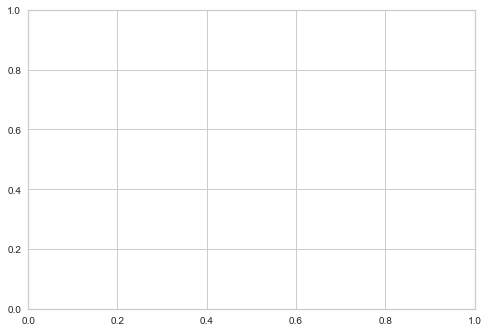

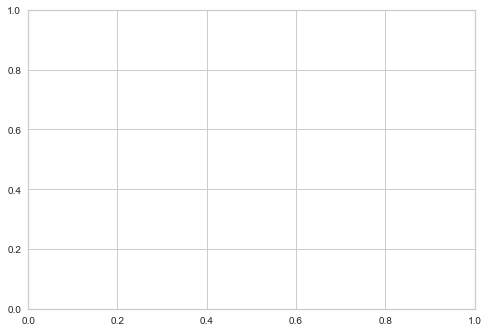

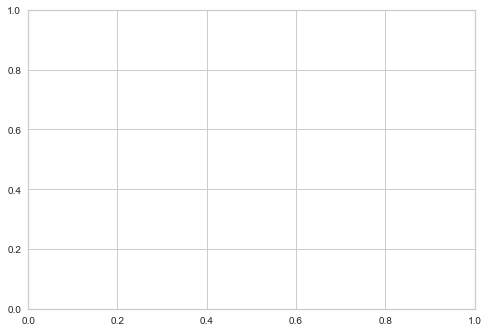

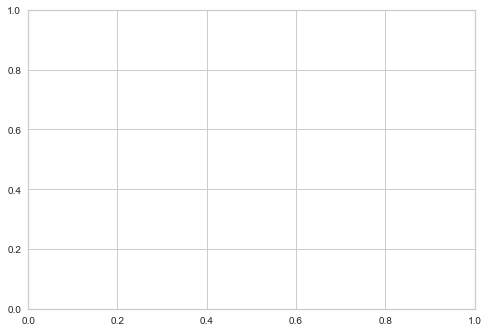

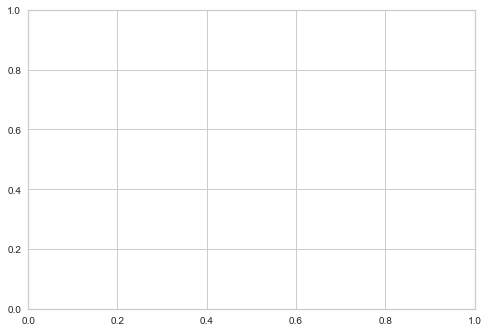

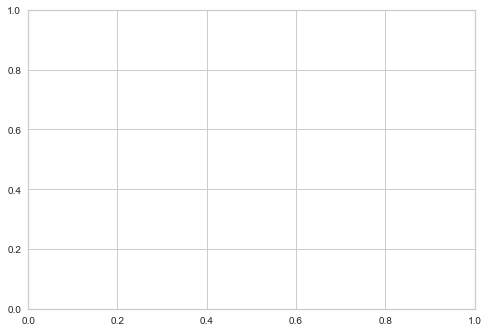

Error in callback <function flush_figures at 0x0000014318F74F70> (for post_execute):


KeyboardInterrupt: 

In [25]:
evaluate_model(tuned)

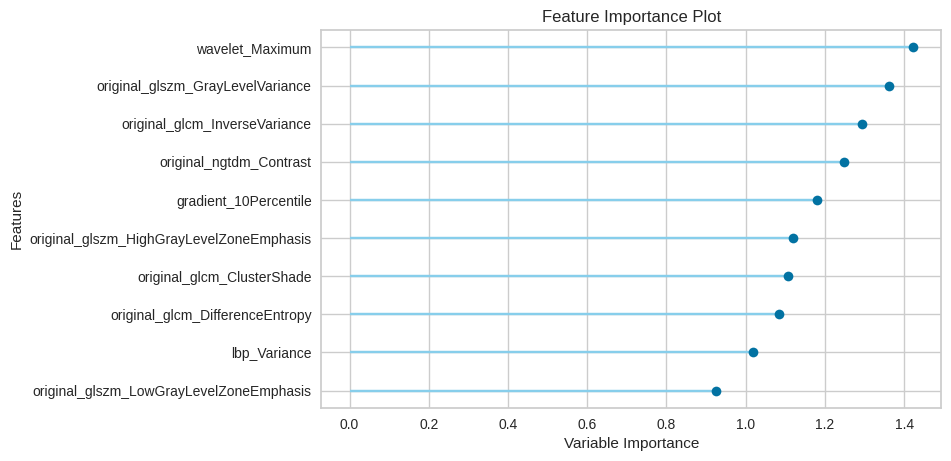

In [87]:
plot_model(tuned, plot='feature')

In [88]:
predict_model(tuned)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9492,0.9713,0.9000,1.0000,0.9474,0.8985,0.9031


,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,...,gradient_Kurtosis,gradient_Maximum,gradient_MeanAbsoluteDeviation,gradient_Minimum,gradient_RobustMeanAbsoluteDeviation,gradient_Uniformity,gradient_Variance,lesion_type,Label,Score
0,0.020349,0.071024,0.390983,-0.128321,-0.030678,0.847754,-0.107100,0.159465,0.238729,-0.193766,...,-0.011407,0.697944,0.231013,-0.802449,0.178543,0.017128,0.091713,CVL,CVL,0.9992
1,0.602783,0.195223,-0.100999,-0.399527,-0.003442,0.420315,-0.407467,0.267648,0.022431,0.261955,...,0.079716,0.590054,0.441110,-0.802449,0.281751,0.476381,0.343461,CVL,CVL,0.9891
2,-0.950374,-1.791965,-0.146148,-0.399527,-0.011187,-1.930599,-0.423235,-1.353808,-1.167209,-0.740631,...,-0.021010,-2.064355,-1.908547,0.524709,-1.729016,-0.503980,-1.688248,MSL,MSL,1.0000
3,1.670578,-0.425773,-3.388738,-1.619954,-0.084425,-1.075721,-1.915328,0.792753,0.671325,2.267126,...,-0.931233,-0.759608,1.567234,-0.802449,1.877368,3.306937,1.395092,MSL,MSL,1.0000
4,-0.367940,-1.791965,-0.882025,-0.806336,-0.241926,-1.716880,-0.985266,-1.175881,-1.167209,-0.102622,...,1.036033,-1.469912,-1.238737,-0.802449,-1.434237,4.428301,-1.187323,MSL,MSL,0.9862
5,-0.659157,-1.667765,-0.330830,-0.670733,0.710938,-1.823739,-0.575396,-1.121496,-0.842762,-0.649486,...,-0.168679,-1.681421,-1.595528,-0.802449,-1.456856,-0.229547,-1.361791,MSL,CVL,0.9595
6,-0.562085,-0.674172,0.457701,-0.399527,0.440471,0.206595,-0.129228,-0.691184,-0.734612,-1.196351,...,1.016162,0.269219,-0.786767,-0.802449,-0.994941,1.097496,-0.755890,CVL,CVL,1.0000
7,-0.076723,0.567820,0.682689,0.414091,-0.166887,1.061473,0.473571,-0.024428,-0.302016,0.444243,...,0.309801,1.191506,0.085624,0.524709,-0.048014,-0.607156,0.088945,CVL,CVL,0.9974
8,0.602783,0.567820,0.052711,0.007282,-0.462558,0.740894,-0.175152,0.486630,0.238729,1.264540,...,-0.531338,0.589561,0.433896,-0.802449,0.449596,-0.845339,0.412024,CVL,CVL,0.9551
9,0.505711,-0.053176,-0.136907,-0.535130,0.631360,-0.113984,-0.565271,0.206009,0.130580,0.079667,...,-0.301362,-0.015010,0.158585,0.524709,0.282148,0.048665,-0.103708,CVL,CVL,0.9907
